### 개인 수입 예측 경진대회
- 어떤 사람이 일년에 개인 수입이 $50k 달러 초과인지 예측해보자.

###  데이터 수집

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv('./data/smhrd/train.csv')
data_test = pd.read_csv('./data/smhrd/test.csv')

In [4]:
print(data_train.shape)
print(data_test.shape)

(29305, 16)
(19537, 15)


### 데이터 전처리
- 결측치, 이상치 확인하기

In [5]:
data_train.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      29305 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  29305 non-null  object
 15  income          29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB


age : 나이  
workclass : 고용 형태  
fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)  
education : 교육 수준 (최종 학력)  
education_num : 교육 수준 수치  
marital_status: 결혼 상태  
occupation : 업종  
relationship : 가족 관계  
race : 인종  
sex : 성별  
capital_gain : 양도 소득  
capital_loss : 양도 손실  
hours_per_week : 주당 근무 시간  
native_country : 국적  
income : 수익 (예측해야 하는 값, target variable)  

In [6]:
data_test.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19537 entries, 0 to 19536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              19537 non-null  int64 
 1   age             19537 non-null  int64 
 2   workclass       19537 non-null  object
 3   fnlwgt          19537 non-null  int64 
 4   education       19537 non-null  object
 5   education-num   19537 non-null  int64 
 6   marital-status  19537 non-null  object
 7   occupation      19537 non-null  object
 8   relationship    19537 non-null  object
 9   race            19537 non-null  object
 10  sex             19537 non-null  object
 11  capital-gain    19537 non-null  int64 
 12  capital-loss    19537 non-null  int64 
 13  hours-per-week  19537 non-null  int64 
 14  native-country  19537 non-null  object
dtypes: int64(7), object(8)
memory usage: 2.2+ MB


In [7]:
data_train.describe()

,no,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,29305.000000,29305.000000,2.930500e+04,29305.000000,29305.000000,29305.000000,29305.000000,29305.000000
mean,14653.000000,38.659171,1.897357e+05,10.083057,1084.531786,87.073571,40.440096,0.240403
std,8459.769156,13.743827,1.056348e+05,2.570371,7495.715677,401.225580,12.332840,0.427335
min,1.000000,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7327.000000,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,14653.000000,37.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,21979.000000,48.000000,2.377130e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,29305.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [11]:
# 불필요한 부분 없애기(no)
data_test =data_test.iloc[:,1:]

In [12]:
data_train = data_train.iloc[:,1:]

In [10]:
# 테스트 데이터, 트레인 데이터 합치기
data_concat = pd.concat([data_train, data_test])
data_concat

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0.0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0.0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0.0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0.0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19532,48838,45,Self-emp-not-inc,116789,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,NaN
19533,48839,48,Private,185079,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,NaN
19534,48840,63,Private,117473,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,4386,0,40,United-States,NaN
19535,48841,18,Private,150817,11th,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,NaN


In [13]:
# 데이터 합치기
data_concat=data_concat.iloc[:,1:]

In [14]:
data_concat

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0.0
1,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0.0
2,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0.0
3,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0.0
4,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19532,45,Self-emp-not-inc,116789,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,NaN
19533,48,Private,185079,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,NaN
19534,63,Private,117473,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,4386,0,40,United-States,NaN
19535,18,Private,150817,11th,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,NaN


In [17]:
# 전처리 되기 이전의 feature들 (전처리 되기전 문제들)
features_raw = data_concat.drop('income', axis = 1)
features_raw

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States
1,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States
2,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti
3,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States
4,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19532,45,Self-emp-not-inc,116789,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States
19533,48,Private,185079,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States
19534,63,Private,117473,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,4386,0,40,United-States
19535,18,Private,150817,11th,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States


In [16]:
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

In [18]:
# min max 스케일러를 이용하여 특징 벡터 (문제들) 스케일링 (최소 최대 정규화)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

In [19]:
features_final = pd.get_dummies(features_log_minmax_transform)

income = np.where(income_raw.values == '>50K', 1, 0)

encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

NameError: name 'income_raw' is not defined

In [8]:
train.head()

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1


In [9]:
# 그래프를 그려주는 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns # 그래프를 쉽게 그렺는 라이브러리

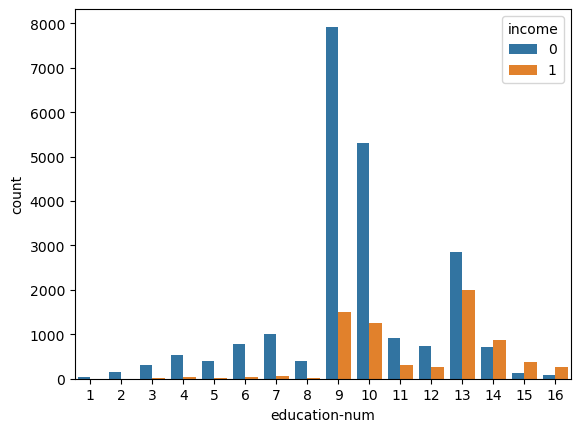

In [10]:
sns.countplot(data=train, x='education-num', hue='income') # 두 개의 값 보여준다.
plt.show()

In [12]:
# 트레인 데이터의 정답
train['income']

0        0
1        0
2        0
3        0
4        1
        ..
29300    0
29301    0
29302    0
29303    0
29304    0
Name: income, Length: 29305, dtype: int64